In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
ltint = pd.read_csv('data\ltint_monthly.csv')
stint = pd.read_csv('data\stint_monthly.csv')
cpi =pd.read_csv('data\cpi.csv')
#cpi =pd.read_csv('data\cpi_2015.csv')
shares = pd.read_csv('data\share_prices.csv')

In [3]:
ltint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LTINT,TOT,PC_PA,M,1969-07,5.8000,NaN
1,AUS,LTINT,TOT,PC_PA,M,1969-08,5.7900,NaN
2,AUS,LTINT,TOT,PC_PA,M,1969-09,5.8100,NaN
3,AUS,LTINT,TOT,PC_PA,M,1969-10,5.8300,NaN
4,AUS,LTINT,TOT,PC_PA,M,1969-11,5.8500,NaN
...,...,...,...,...,...,...,...,...
3849,EA19,LTINT,TOT,PC_PA,M,2020-12,-0.0915,NaN
3850,EA19,LTINT,TOT,PC_PA,M,2021-01,-0.0636,NaN
3851,EA19,LTINT,TOT,PC_PA,M,2021-02,0.0644,NaN
3852,EA19,LTINT,TOT,PC_PA,M,2021-03,0.1478,NaN


In [4]:
ltint.LOCATION.unique()

array(['AUS', 'CAN', 'USA', 'GBR', 'JPN', 'EA19'], dtype=object)

In [5]:
wanted = set(['CAN', 'USA', 'GBR'])

In [6]:
wanted

{'CAN', 'GBR', 'USA'}

In [7]:
ltint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LTINT,TOT,PC_PA,M,1969-07,5.8000,NaN
1,AUS,LTINT,TOT,PC_PA,M,1969-08,5.7900,NaN
2,AUS,LTINT,TOT,PC_PA,M,1969-09,5.8100,NaN
3,AUS,LTINT,TOT,PC_PA,M,1969-10,5.8300,NaN
4,AUS,LTINT,TOT,PC_PA,M,1969-11,5.8500,NaN
...,...,...,...,...,...,...,...,...
3849,EA19,LTINT,TOT,PC_PA,M,2020-12,-0.0915,NaN
3850,EA19,LTINT,TOT,PC_PA,M,2021-01,-0.0636,NaN
3851,EA19,LTINT,TOT,PC_PA,M,2021-02,0.0644,NaN
3852,EA19,LTINT,TOT,PC_PA,M,2021-03,0.1478,NaN


* We only need the columns for location, time and value
* Value needs to be changed to indicate long term interst rate

In [8]:
ltint = ltint[['LOCATION', 'TIME', 'Value']]
ltint = ltint.rename(columns={"Value": "lt_int"})

* This works

In [9]:
stint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,CHL,STINT,TOT,PC_PA,M,1997-07,12.54,NaN
1,CHL,STINT,TOT,PC_PA,M,1997-08,13.77,NaN
2,CHL,STINT,TOT,PC_PA,M,1997-09,13.47,NaN
3,CHL,STINT,TOT,PC_PA,M,1997-10,14.82,NaN
4,CHL,STINT,TOT,PC_PA,M,1997-11,13.04,NaN
...,...,...,...,...,...,...,...,...
17396,IND,STINT,TOT,PC_PA,M,2020-11,3.06,NaN
17397,IND,STINT,TOT,PC_PA,M,2020-12,3.10,NaN
17398,IND,STINT,TOT,PC_PA,M,2021-01,3.21,NaN
17399,IND,STINT,TOT,PC_PA,M,2021-02,3.26,NaN


In [10]:
stint.LOCATION.unique()


array(['CHL', 'USA', 'NZL', 'DNK', 'ISR', 'GBR', 'BEL', 'RUS', 'IDN',
       'HUN', 'FIN', 'LUX', 'ESP', 'NOR', 'JPN', 'GRC', 'KOR', 'AUT',
       'SVK', 'EST', 'SVN', 'CAN', 'DEU', 'PRT', 'ISL', 'AUS', 'IRL',
       'NLD', 'CHE', 'ZAF', 'CZE', 'POL', 'CHN', 'SWE', 'MEX', 'FRA',
       'ITA', 'COL', 'LVA', 'EA19', 'LTU', 'CRI', 'IND'], dtype=object)

In [11]:
stint = stint[['LOCATION', 'TIME', 'Value']]
stint =stint.rename(columns={"Value": "st_int"})

* We'll do the same thing to this df

In [12]:
cpi =cpi[['LOCATION', 'TIME', 'Value']]
cpi =cpi.rename(columns={"Value": "cpi_ag"})

* We only need the data for the US, Canada and Great Britain

In [13]:
shares = shares[['LOCATION', 'TIME', 'Value']]
shares =shares.rename(columns={"Value": "share_pr"})

In [14]:
cpi.describe()

,cpi_ag
count,3086.000000
mean,3.590916
std,3.849639
min,-2.500000
25%,1.362510
50%,2.400000
75%,4.486567
max,26.867030


In [15]:
ltint.LOCATION.unique()

array(['AUS', 'CAN', 'USA', 'GBR', 'JPN', 'EA19'], dtype=object)

In [16]:
def country(cont_name):
    st = stint[stint['LOCATION'] == cont_name]
    lt = ltint[ltint['LOCATION'] == cont_name]
    inf = cpi[cpi['LOCATION'] == cont_name]
    s_p = shares[shares['LOCATION'] == cont_name]
    rates = pd.merge(st, lt, how='inner', on=['TIME', 'LOCATION'])
    rates = pd.merge(rates, inf, how='inner', on=['TIME', 'LOCATION'])
    rates = pd.merge(rates, s_p, how='inner', on=['TIME', 'LOCATION'])
    rates['TIME'] = pd.to_datetime(rates['TIME'])
    return rates

In [17]:
df_can = country('CAN')
df_usa = country('USA')
df_gbr = country('GBR')

In [18]:
df_usa

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr
0,USA,1964-06-01,3.86,4.17,1.307190,4.262905
1,USA,1964-07-01,3.87,4.19,1.302932,4.415434
2,USA,1964-08-01,3.85,4.19,0.977199,4.367893
3,USA,1964-09-01,3.87,4.20,1.302932,4.448119
4,USA,1964-10-01,3.94,4.19,0.974026,4.532308
...,...,...,...,...,...,...
674,USA,2020-09-01,0.13,0.68,1.371325,119.745600
675,USA,2020-10-01,0.12,0.79,1.182066,121.471100
676,USA,2020-11-01,0.16,0.87,1.174536,128.248000
677,USA,2020-12-01,0.17,0.93,1.362005,134.594100


In [19]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 678
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LOCATION  679 non-null    object        
 1   TIME      679 non-null    datetime64[ns]
 2   st_int    679 non-null    float64       
 3   lt_int    679 non-null    float64       
 4   cpi_ag    679 non-null    float64       
 5   share_pr  679 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 37.1+ KB


<AxesSubplot:xlabel='TIME', ylabel='st_int'>

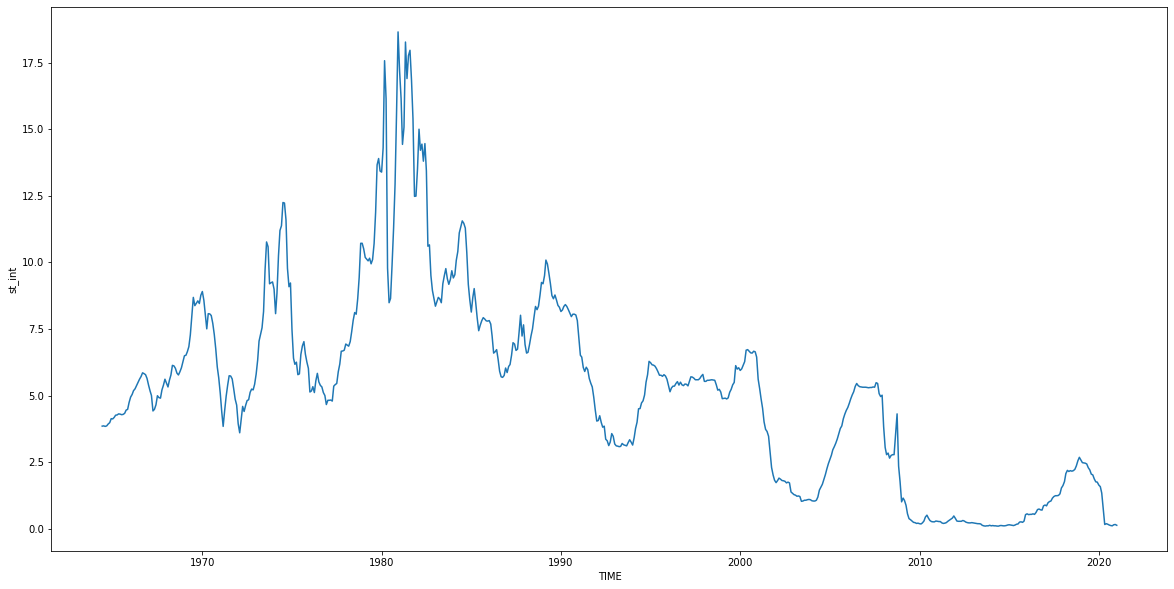

In [20]:
sns.lineplot(data=df_usa, x='TIME', y='st_int')

In [21]:
def quick_plot(df):

    for metric in df[['st_int', 'lt_int', 'cpi_ag']]:
        sns.lineplot(data=df, x='TIME', y=metric)
    

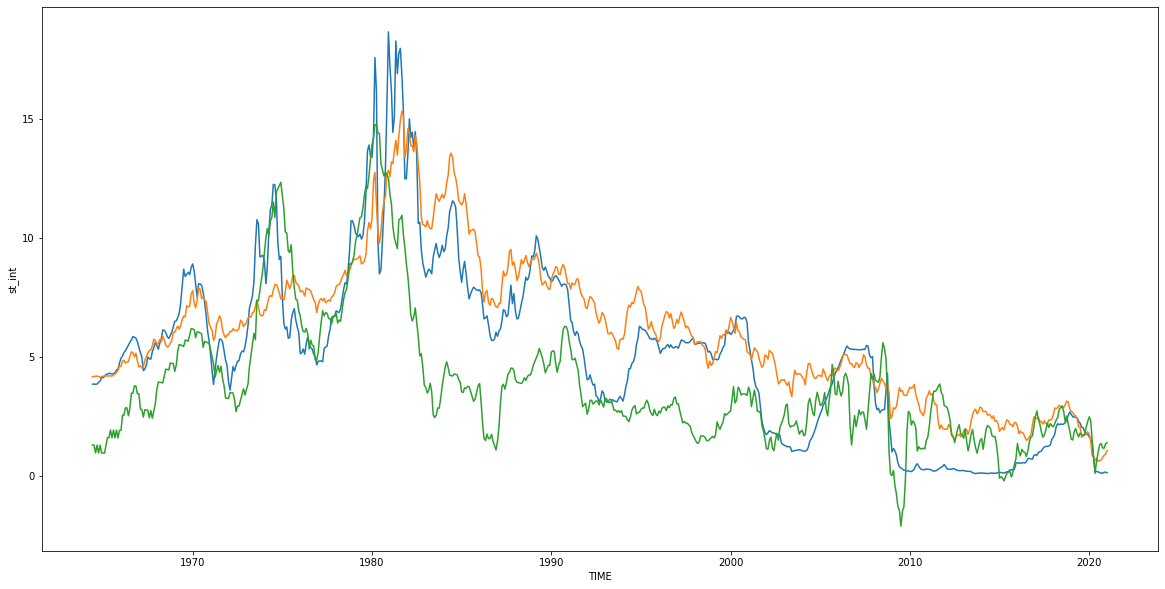

In [22]:
quick_plot(df_usa)

In [23]:
df_gbr

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr
0,GBR,1986-01-01,12.86300,11.1300,5.482456,21.25789
1,GBR,1986-02-01,12.71875,10.7300,5.114254,22.47751
2,GBR,1986-03-01,11.77679,9.6900,4.202586,24.54353
3,GBR,1986-04-01,10.57670,8.9400,3.059072,25.31778
4,GBR,1986-05-01,10.26705,9.1500,2.731092,24.35308
...,...,...,...,...,...,...
416,GBR,2020-09-01,0.06000,0.2730,0.700000,89.96510
417,GBR,2020-10-01,0.05000,0.3058,0.900000,88.72897
418,GBR,2020-11-01,0.04000,0.3836,0.600000,94.35523
419,GBR,2020-12-01,0.03000,0.3224,0.800000,98.82664


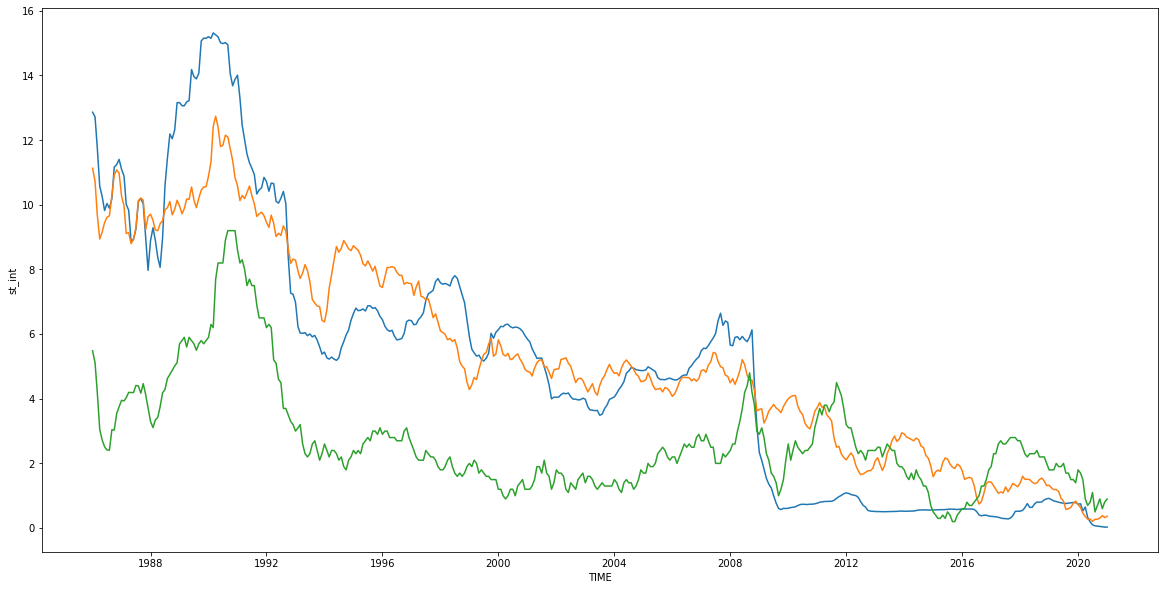

In [24]:
quick_plot(df_gbr)

In [25]:
df_usa['st_adj'] = df_usa['st_int']/df_usa['cpi_ag'] 
df_usa['lt_adj'] = df_usa['lt_int']/df_usa['cpi_ag'] 
df_usa['int_gap'] = df_usa['lt_int'] - df_usa['st_int']
df_usa['gap_adj'] = df_usa['int_gap']/df_usa['cpi_ag'] 

In [26]:
df_usa

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj
0,USA,1964-06-01,3.86,4.17,1.307190,4.262905,2.952899,3.190049,0.31,0.237150
1,USA,1964-07-01,3.87,4.19,1.302932,4.415434,2.970224,3.215824,0.32,0.245600
2,USA,1964-08-01,3.85,4.19,0.977199,4.367893,3.939833,4.287767,0.34,0.347933
3,USA,1964-09-01,3.87,4.20,1.302932,4.448119,2.970224,3.223499,0.33,0.253275
4,USA,1964-10-01,3.94,4.19,0.974026,4.532308,4.045067,4.301733,0.25,0.256667
...,...,...,...,...,...,...,...,...,...,...
674,USA,2020-09-01,0.13,0.68,1.371325,119.745600,0.094799,0.495871,0.55,0.401072
675,USA,2020-10-01,0.12,0.79,1.182066,121.471100,0.101517,0.668321,0.67,0.566804
676,USA,2020-11-01,0.16,0.87,1.174536,128.248000,0.136224,0.740718,0.71,0.604494
677,USA,2020-12-01,0.17,0.93,1.362005,134.594100,0.124816,0.682817,0.76,0.558001


<AxesSubplot:xlabel='TIME', ylabel='st_adj'>

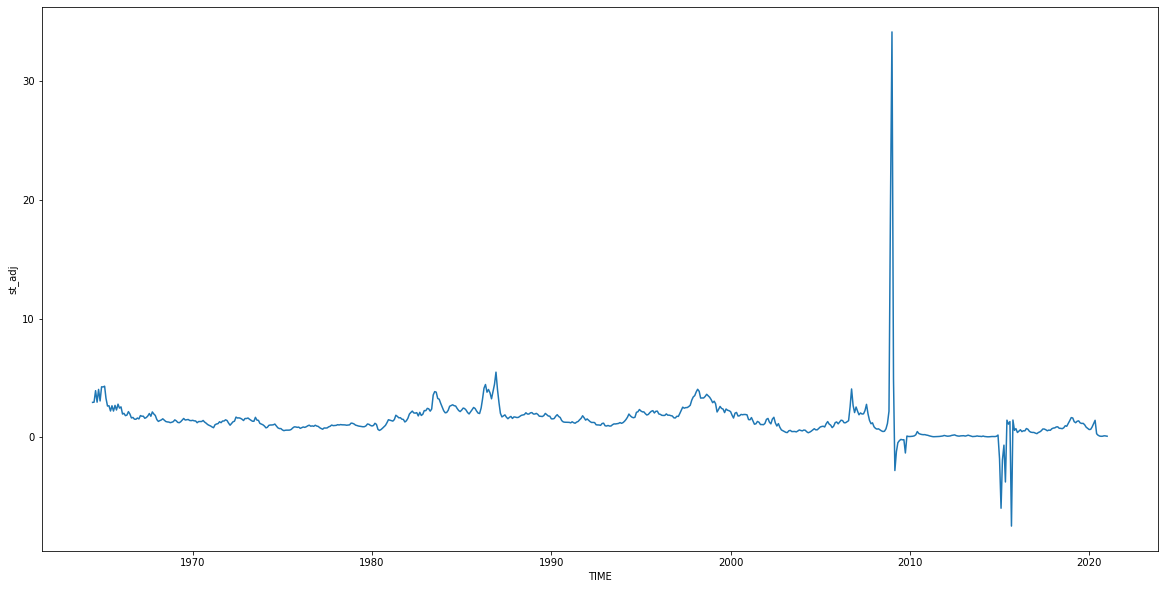

In [27]:
sns.lineplot(data=df_usa,
         x='TIME', y='st_adj')


(-2.0, 15.0)

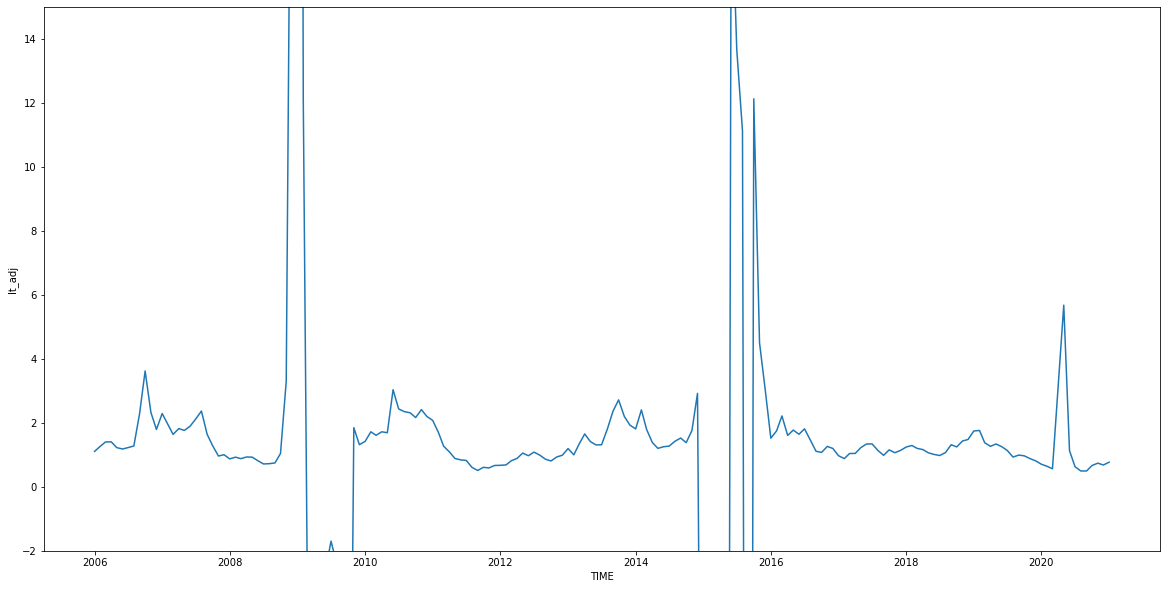

In [39]:
sns.lineplot(data=df_usa.loc[df_usa['TIME'] >= '2006-01-01'],
         x='TIME', y='lt_adj')
plt.ylim(-2, 15)

In [29]:
df_2008 =df_usa.loc[(df_usa['TIME'] >= '2008-06-01') & (
            df_usa['TIME'] < '2010-04-01')]
df_2008

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj
528,USA,2008-06-01,2.76,4.10,5.021790,84.26327,0.549605,0.816442,1.34,0.266837
529,USA,2008-07-01,2.79,4.01,5.600123,78.95065,0.498203,0.716056,1.22,0.217852
530,USA,2008-08-01,2.79,3.89,5.371855,78.31818,0.519374,0.724145,1.10,0.204771
531,USA,2008-09-01,3.59,3.69,4.936927,74.07194,0.727173,0.747429,0.10,0.020256
532,USA,2008-10-01,4.32,3.81,3.655186,57.41563,1.181882,1.042355,-0.51,-0.139528
533,USA,2008-11-01,2.36,3.53,1.069575,51.77961,2.206484,3.300376,1.17,1.093892
534,USA,2008-12-01,1.77,2.42,0.091413,51.73662,19.362694,26.473288,0.65,7.110594
535,USA,2009-01-01,1.02,2.52,0.029846,51.37847,34.174861,84.432010,1.50,50.257149
536,USA,2009-02-01,1.16,2.87,0.236191,47.38305,4.911277,12.151178,1.71,7.239900
537,USA,2009-03-01,1.07,2.82,-0.383556,44.39098,-2.789682,-7.352247,1.75,-4.562565


In [38]:
df_1516 = df_usa.loc[(df_usa['TIME'] >= '2015-01-01') & (
            df_usa['TIME'] < '2016-04-01')]
df_1516

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj,delta_share
607,USA,2015-01-01,0.16,1.88,-0.089348,100.07910,-1.790744,-21.041246,1.72,-19.250502,-2.30880
608,USA,2015-02-01,0.15,1.98,-0.025130,102.77560,-5.969009,-78.790918,1.83,-72.821909,4.70349
609,USA,2015-03-01,0.14,2.04,-0.073637,102.25370,-1.901208,-27.703318,1.90,-25.802109,-0.00650
610,USA,2015-04-01,0.13,1.94,-0.199517,103.84880,-0.651572,-9.723463,1.81,-9.071890,2.47230
611,USA,2015-05-01,0.15,2.20,-0.039933,104.40680,-3.756315,-55.092624,2.05,-51.336309,4.32770
612,USA,2015-06-01,0.18,2.36,0.123771,103.16320,1.454296,19.067441,2.18,17.613144,0.38760
613,USA,2015-07-01,0.19,2.32,0.169570,101.69380,1.120483,13.681682,2.13,12.561199,-0.55990
614,USA,2015-08-01,0.26,2.17,0.195079,98.64014,1.332791,11.123681,1.91,9.790890,-5.20866
615,USA,2015-09-01,0.27,2.17,-0.036130,93.22412,-7.473066,-60.061307,1.90,-52.588241,-11.18268
616,USA,2015-10-01,0.25,2.07,0.170574,96.70031,1.465636,12.135467,1.82,10.669831,-6.46289


(-2.0, 10.0)

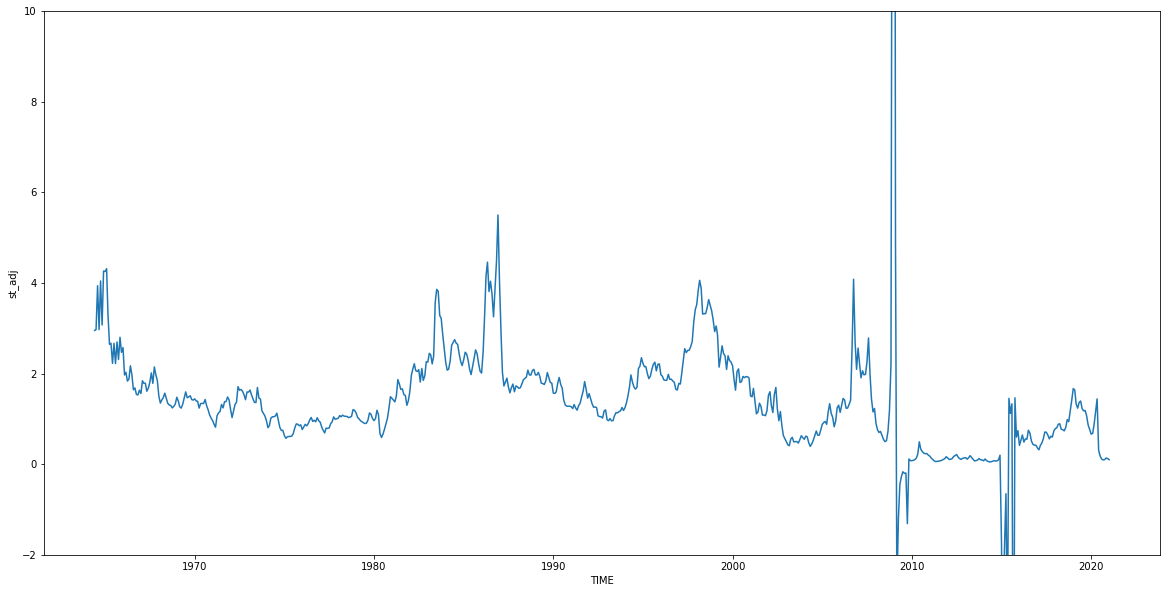

In [37]:
sns.lineplot(data=df_usa, x='TIME', y='st_adj')
plt.ylim(-2, 10)

(-1.0, 12.0)

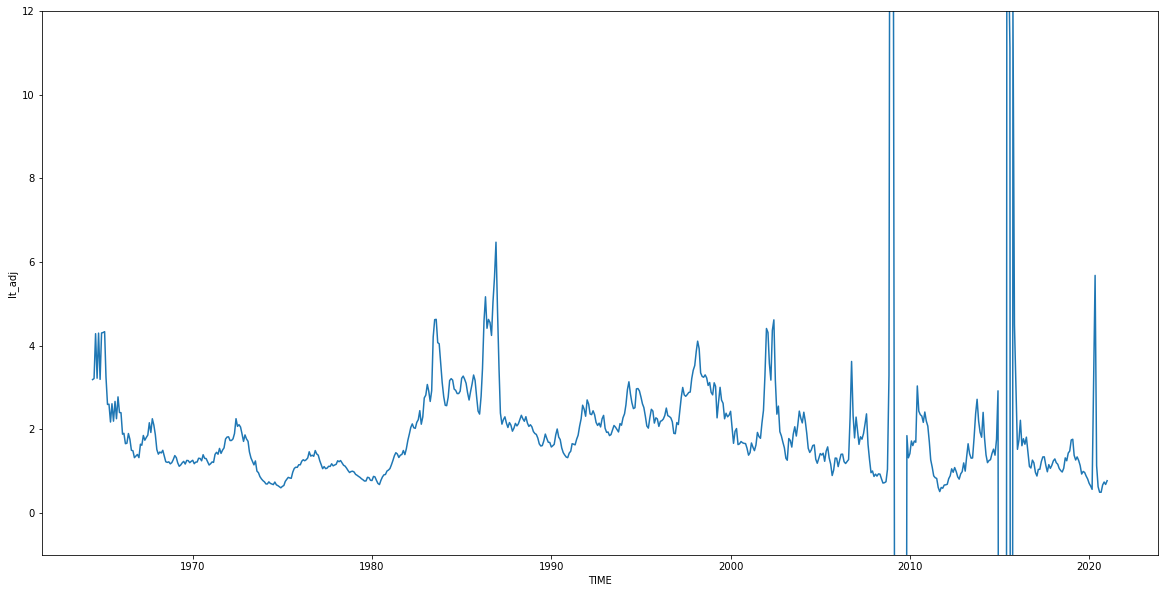

In [31]:
sns.lineplot(data=df_usa,
         x='TIME', y='lt_adj')

plt.ylim(-1, 12)

(-1.0, 5.0)

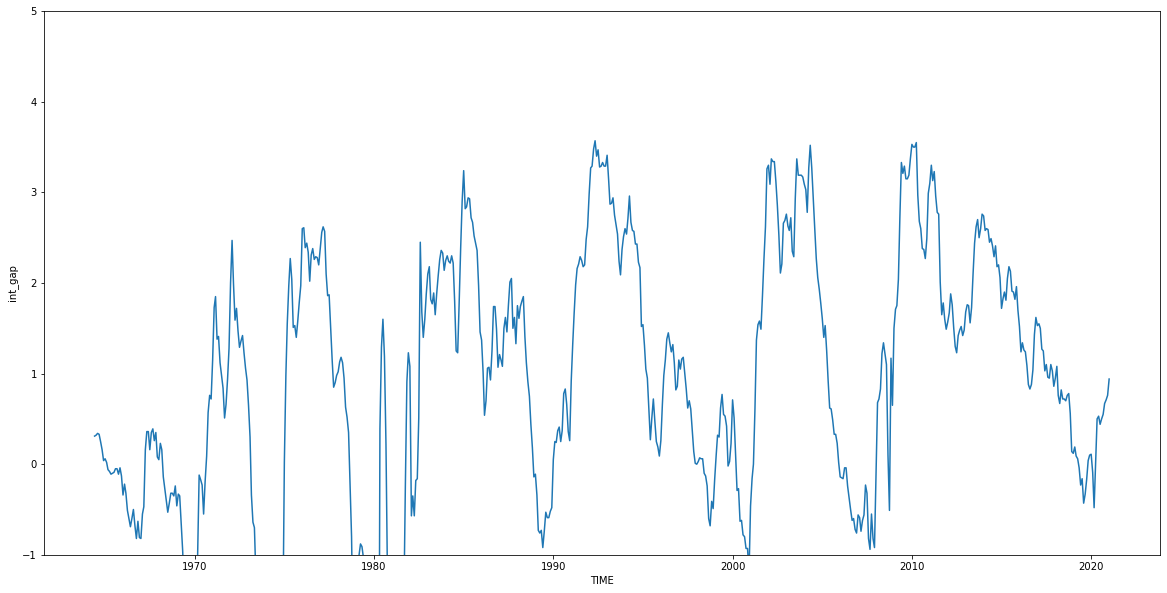

In [43]:
sns.lineplot(data=df_usa, x='TIME', y='int_gap')
plt.ylim(-1, 5)

<AxesSubplot:xlabel='TIME', ylabel='share_pr'>

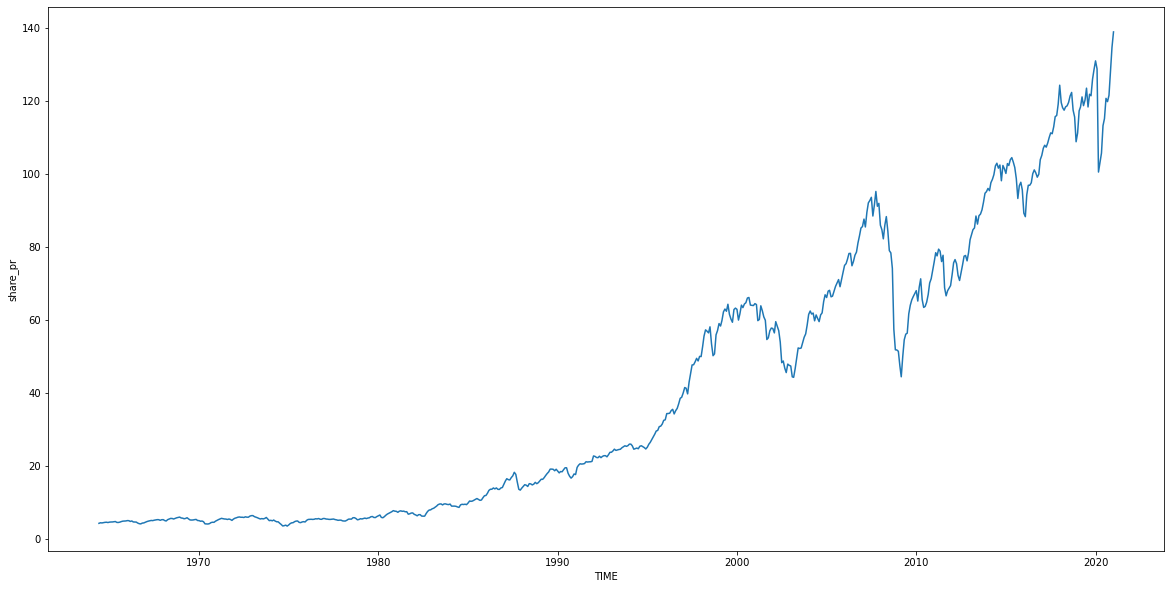

In [33]:
sns.lineplot(data=df_usa, x='TIME', y='share_pr')

In [34]:
df_usa['delta_share'] =df_usa['share_pr'].diff(4)

<AxesSubplot:xlabel='TIME', ylabel='delta_share'>

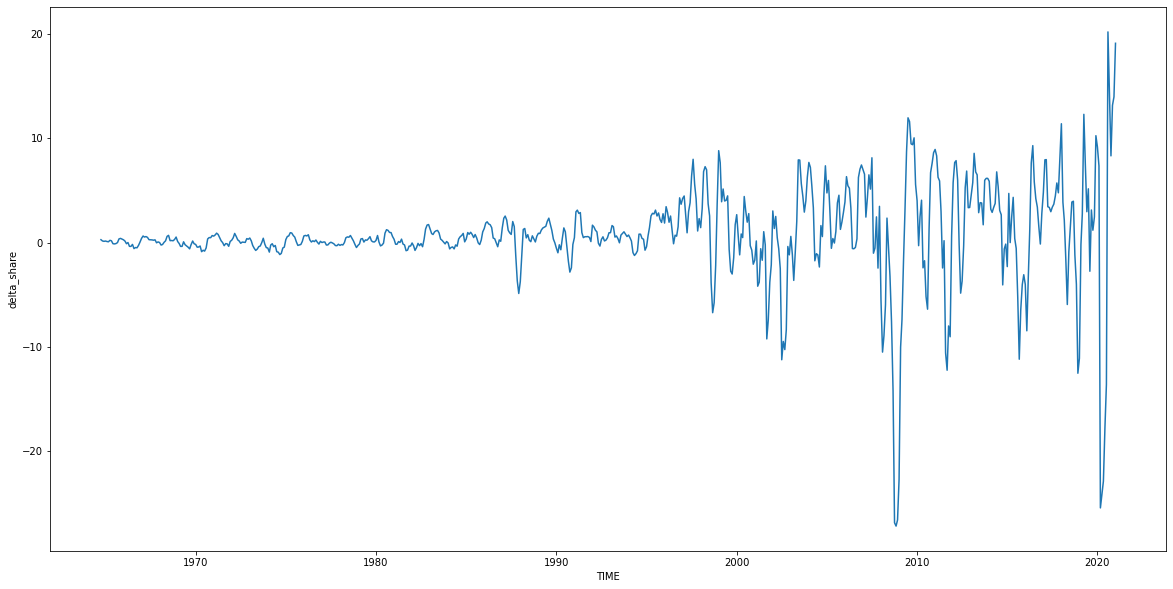

In [35]:
sns.lineplot(data=df_usa, x='TIME', y='delta_share')

random walk, arma, ltsm